In [1]:
# 데이터 준비하기

from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
norm_layer = tf.keras.layers.Normalization(axis = -1, dtype = 'float32')
norm_layer.adapt(x_train)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print('data ready~')

data ready~


In [2]:
# CIFAR-10 배치 정규화 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [3]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 모델 학습하기

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 296s 179ms/step - acc: 0.4160 - loss: 1.6430 - val_acc: 0.5756 - val_loss: 1.1837
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 204s 186ms/step - acc: 0.6363 - loss: 1.0494 - val_acc: 0.6285 - val_loss: 1.0470
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 158s 145ms/step - acc: 0.7206 - loss: 0.8158 - val_acc: 0.6726 - val_loss: 0.9302
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 139s 127ms/step - acc: 0.7905 - loss: 0.6449 - val_acc: 0.6631 - val_loss: 0.9619
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 167s 153ms/step - acc: 0.8364 - loss: 0.5188 - val_acc: 0.6590 - val_loss: 0.9841
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 188s 171ms/step - acc: 0.8834 - loss: 0.3955 - val_acc: 0.6643 - val_loss: 1.0179
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 226s 207ms/step - acc: 0.9209 - loss: 0.2958 - val_acc: 0.6751 - val_loss: 1.0035
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 241s 187ms/step - acc: 0.9425 - loss: 0.2254 - val_acc: 0.6898 - val_loss: 0.9839
Epoch 9/

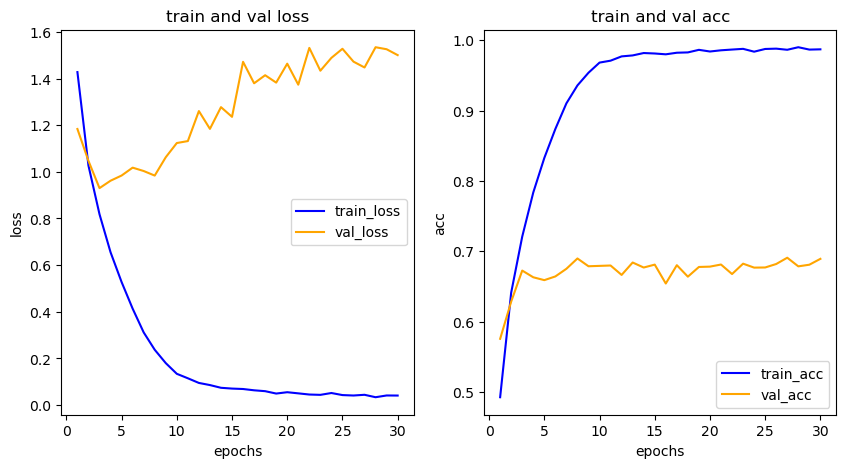

In [5]:
# 학습 과정 그리기

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()